## Explore Bike Share Data

### Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangle">Data Wrangling</a></li>
<li><a href="#Q1">Question 1</a></li>
<li><a href="#Q2">Question 2</a></li>
<li><a href="#Q3">Question 3</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>


<a id='Intro'></a>
## Introduction


In this project I explored three questions regarding a bike shareing system in Washington, New York City, and Chicago. The three questions are:

1. What are the most popular riding days per city?
2. What city has the most customers overall and subscribers?
3. What is the typical trip duration?


In [1]:
library(ggplot2)
library(lubridate)
library(scales)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


<a id='Wrangle'></a>
## Data Wrangling

Light data wrangling to combine all three datasets. 

In [6]:
# Add Gender and Birth.Year to wash dataset

wash$Gender <- NA
wash$Birth.Year <- NA

head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA


In [7]:
#Add a 'City' column

ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [8]:
# Use rbind to add all rows of data into the city data frame.

all_data <- rbind(ny, chi, wash)

sample <- all_data[sample(nrow(all_data), size=10),]
sample

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
23438,6702436,2017-06-29 08:26:18,2017-06-29 08:32:06,347.000,8 Ave & W 16 St,Greenwich Ave & Charles St,Subscriber,Female,1994,New York City
17912,2679599,2017-04-12 08:26:29,2017-04-12 08:44:39,1090.000,W 64 St & West End Ave,E 47 St & Park Ave,Subscriber,Male,1980,New York City
118081,882962,2017-04-19 06:29:04,2017-04-19 06:44:01,897.064,14th & D St SE,6th St & Indiana Ave NW,Subscriber,NA,NA,Washington
24646,5840940,2017-06-14 08:50:07,2017-06-14 08:56:14,367.000,Graham Ave & Grand St,S 5 Pl & S 4 St,Subscriber,Female,1991,New York City
134110,1079821,2017-05-07 06:33:09,2017-05-07 06:37:16,247.161,11th & F St NW,8th & F St NW,Customer,NA,NA,Washington
70958,1201456,2017-05-18 08:24:58,2017-05-18 08:45:32,1234.683,N Veitch & 20th St N,13th St & New York Ave NW,Subscriber,NA,NA,Washington
34152,4064671,2017-05-10 21:51:10,2017-05-10 22:15:05,1434.000,W 87 St & Amsterdam Ave,W 95 St & Broadway,Subscriber,Male,1988,New York City
11529,3943937,2017-05-08 19:20:29,2017-05-08 19:37:25,1015.000,S 5 Pl & S 4 St,Monroe St & Tompkins Ave,Subscriber,Male,1985,New York City
66955,688805,2017-04-04 07:29:54,2017-04-04 07:36:29,395.349,20th St & Florida Ave NW,17th & Corcoran St NW,Subscriber,NA,NA,Washington
92639,1579133,2017-06-18 03:20:42,2017-06-18 04:34:38,4436.158,Jefferson Memorial,14th & L St NW,Customer,NA,NA,Washington


<a id='Q1'></a>
### Question 1


What are the most popular riding days per city?

In [9]:
#Change the Start.Time to correct datatypes. 

all_data$Weekday <- weekdays(as.Date(all_data$Start.Time))
table(all_data$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    22379     20593     19459     19274     23187     22478     25080 

In [10]:
all_data$Day.Of.Month <- day(as.Date(all_data$Start.Time))
table(all_data$Day.Of.Month)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
4986 5184 4971 4539 4378 4283 4353 5247 5411 4958 4667 4856 4901 4485 5023 4724 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
4774 5472 5252 5520 5781 4504 5213 5502 5006 5257 5917 5597 4961 4711 2017 

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

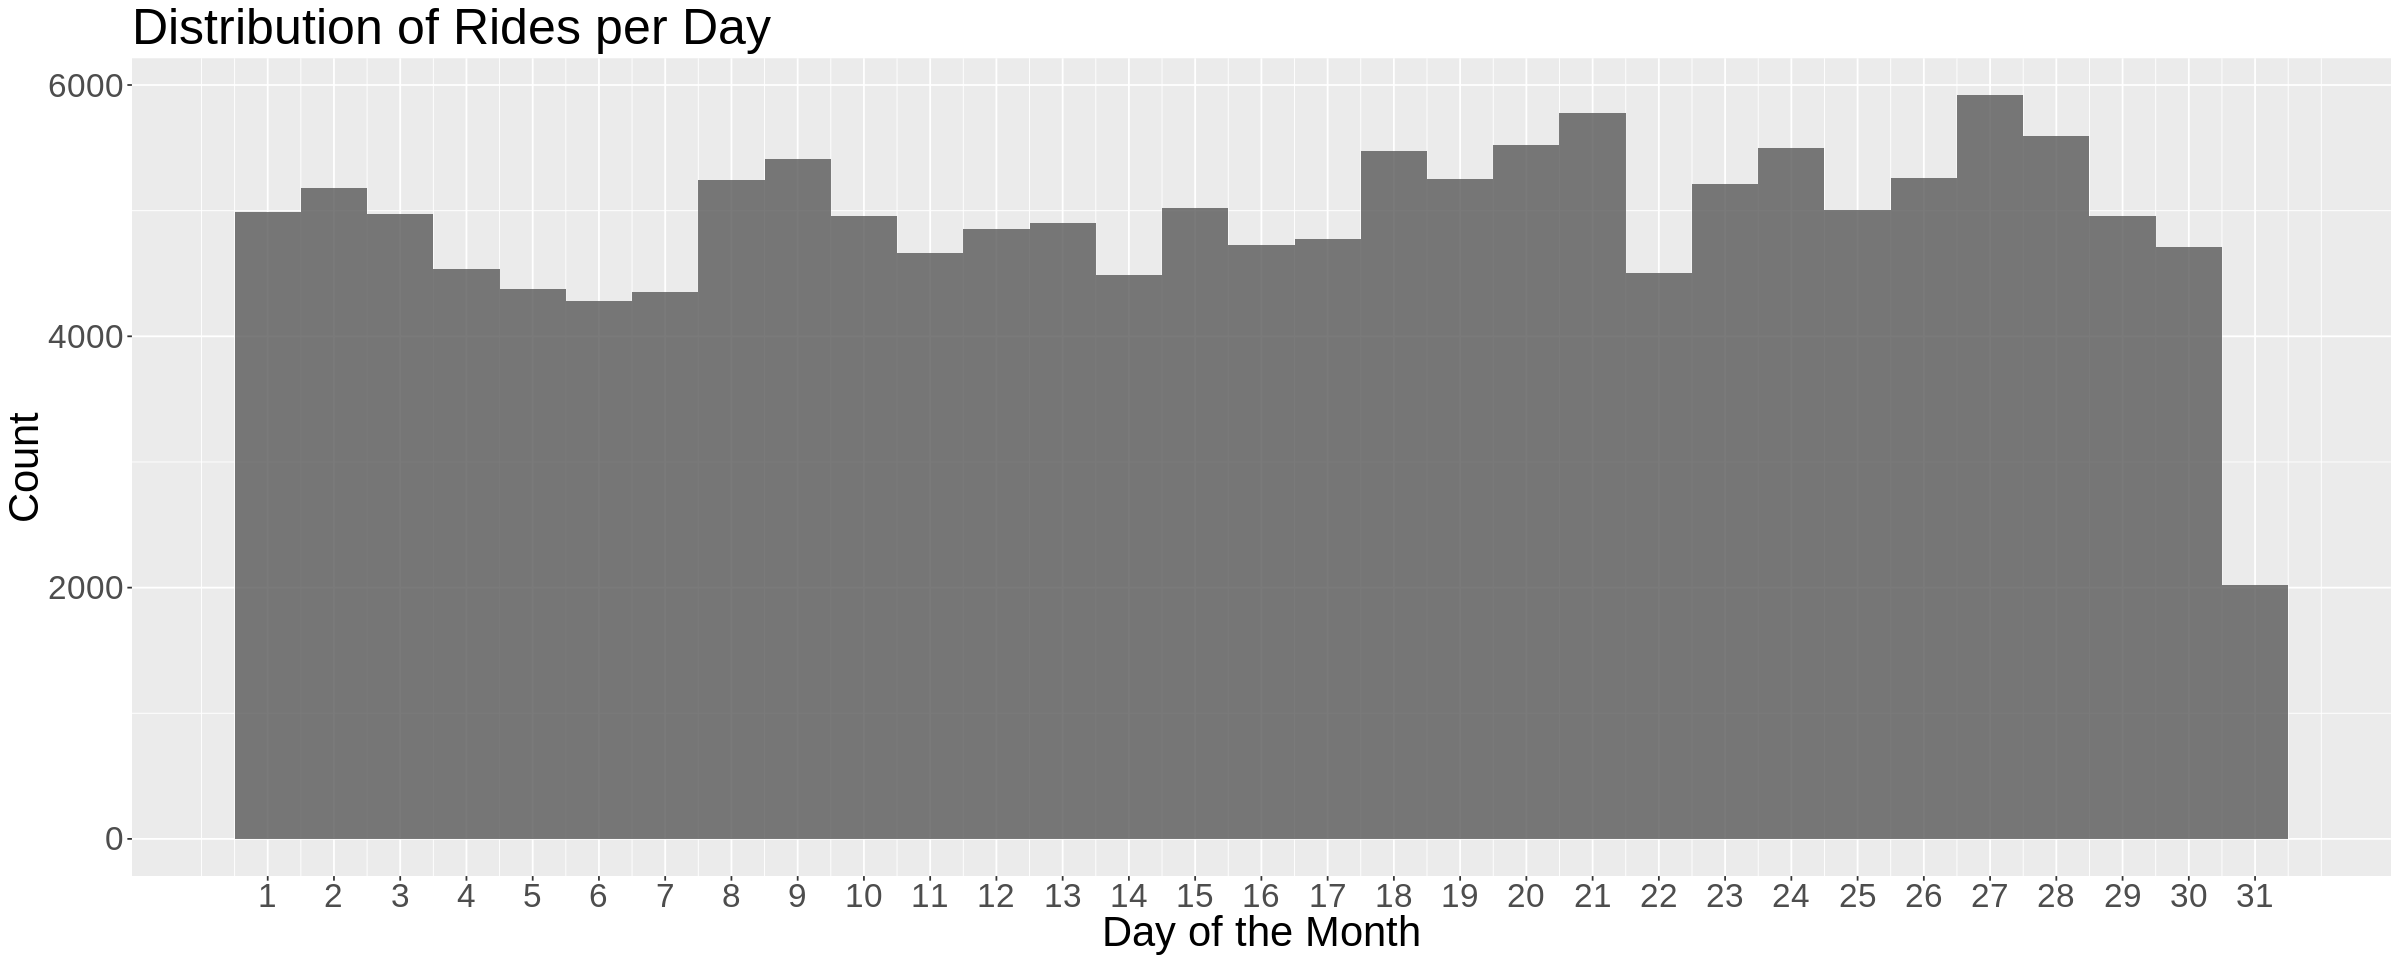

In [11]:
options(repr.plot.width=20, repr.plot.height=8)

ggplot (aes(x=Day.Of.Month), data=all_data) +
    geom_histogram (binwidth = 1, alpha=0.8) +
    scale_x_continuous(breaks= 1:31)+
    theme(text = element_text(size = 25))+ 
    labs(title = "Distribution of Rides per Day",
         x = 'Day of the Month',
         y = 'Count')

It looks like the most popular day of the month is the 27th, with the 20th as a close second. However, since the distribution of the data isn't normal and has several higher points I want to dive deeper to see if the day of the week gives us more information

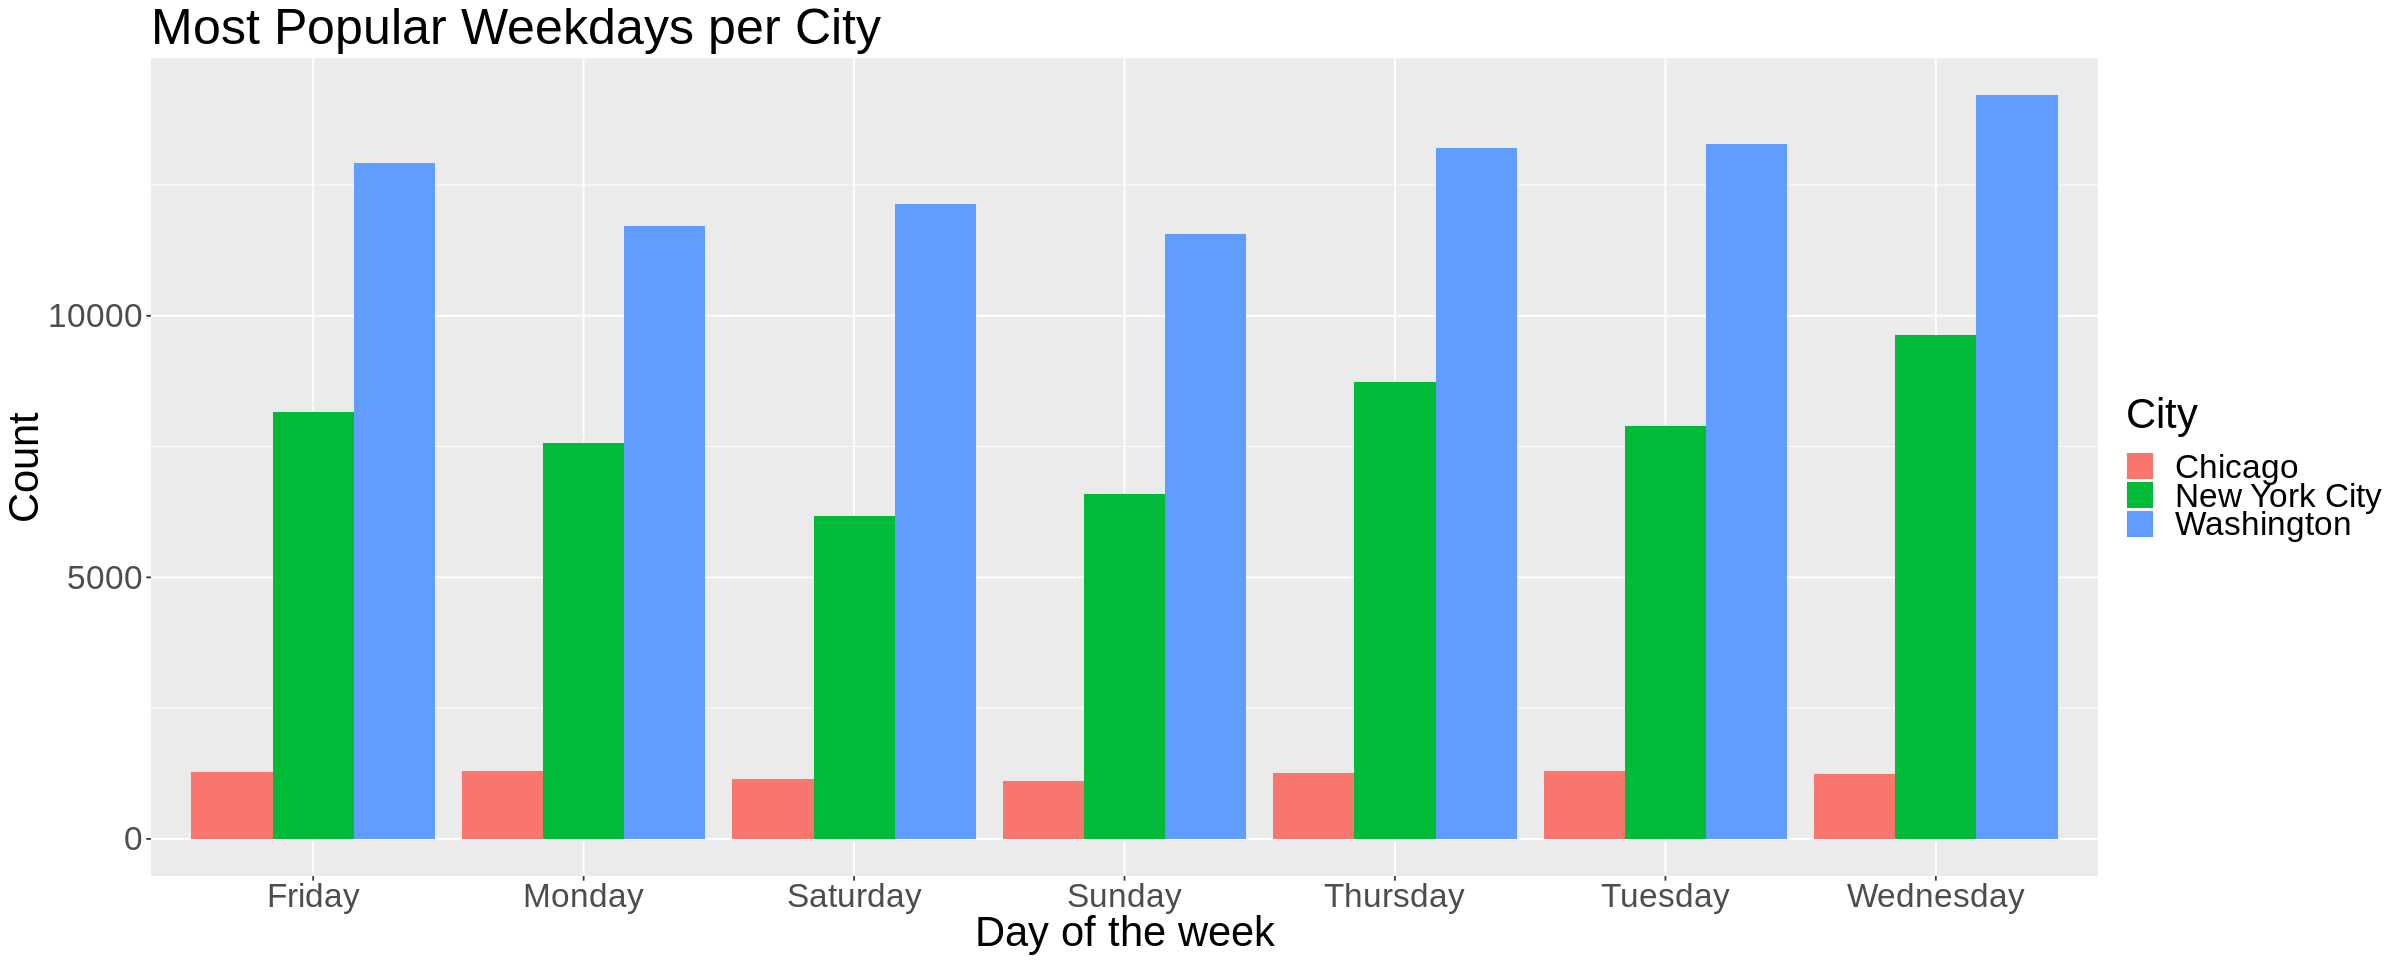

In [12]:
ggplot(aes(x=Weekday, fill=City), data=subset(all_data, !(is.na(Weekday)))) +
    geom_bar(position='dodge') +
    theme(text = element_text(size = 25))+ 
    labs(title = "Most Popular Weekdays per City",
         x = 'Day of the week',
         y = 'Count')

**Summary**

The data shows us that the most popular days are dependent on the market. Chicago's most popular day is Friday followed very closely by Monday. NYC and Washington both have Wednesday as the most popular days but the second most popular day in New York is Thursday, whereas in Washington it is Tuesday.


<a id='Q2'></a>
### Question 2

What city has the most customers overall and subscribers?

In [13]:
cust_count <- table(all_data$City)
cust_count


      Chicago New York City    Washington 
         8630         54770         89051 

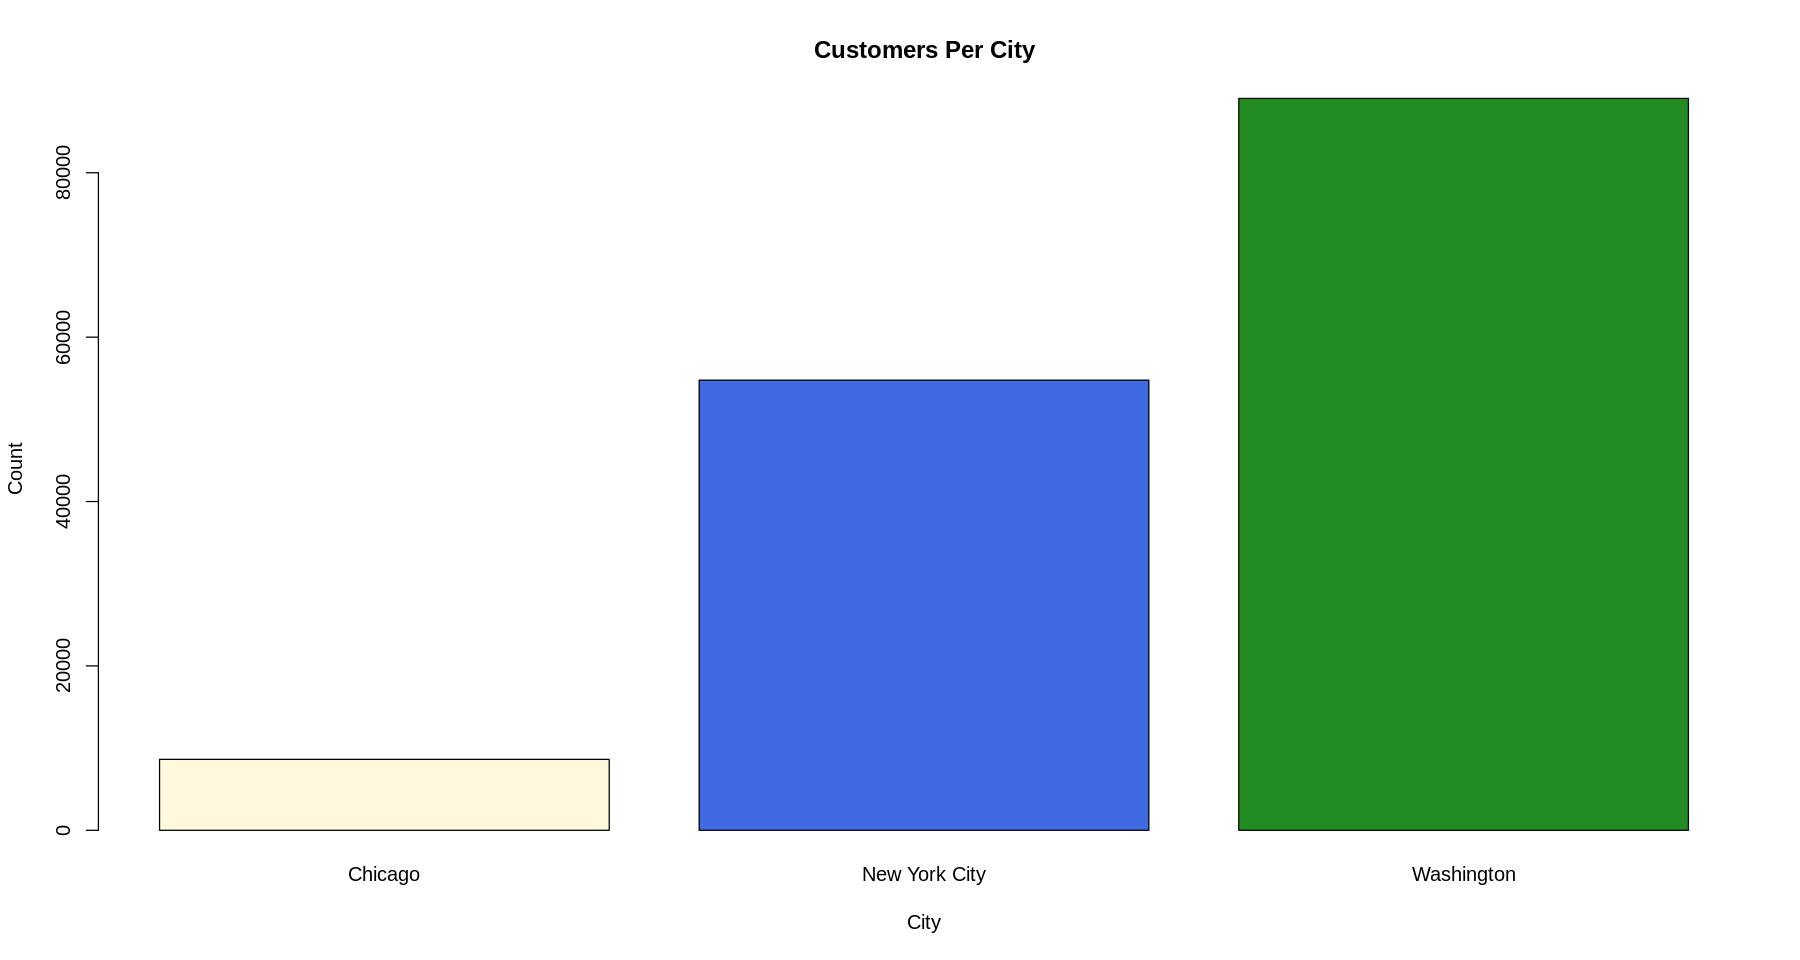

In [14]:
options(repr.plot.width=15, repr.plot.height=8)

barplot(cust_count, main="Customers Per City", xlab='City', ylab='Count', 
        names=c('Chicago', 'New York City', 'Washington'),
       col = c('cornsilk', 'royalblue', 'forestgreen'), 
       border=TRUE)



Washington is by far the largest market and Chicago is the smallest.

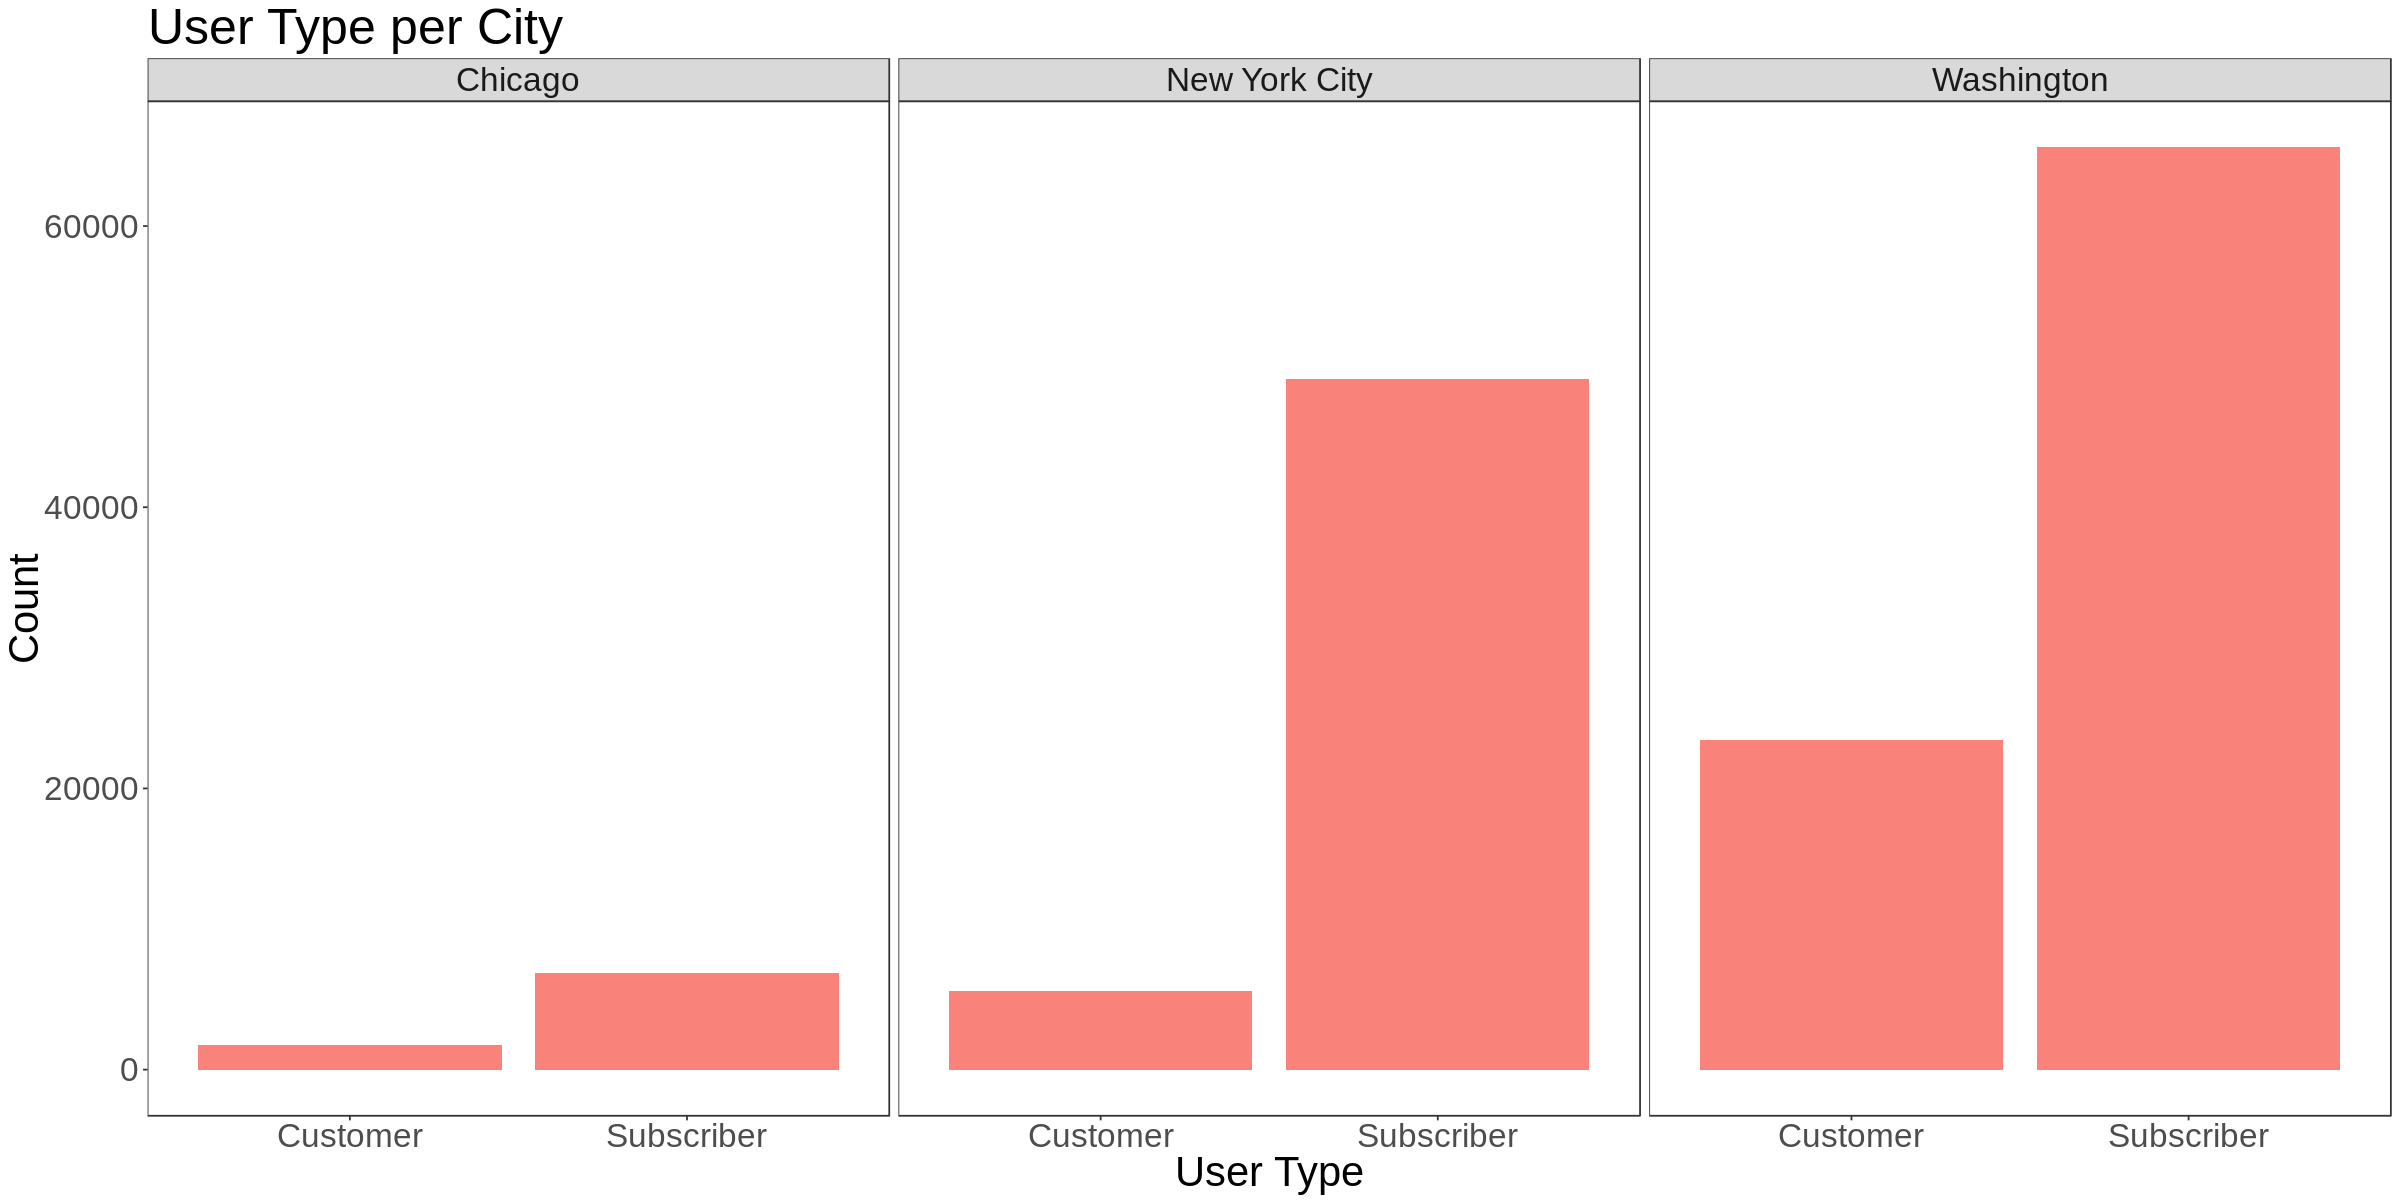

In [15]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(data=subset(all_data, !(is.na(User.Type)|User.Type=="")), aes(x= User.Type, fill='City')) +
    geom_bar(alpha= 0.9) +
    facet_wrap(~City)+
    theme_bw()+
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.position = "none") +
    theme(text = element_text(size = 25))+ 
    labs(title = "User Type per City",
         x = 'User Type',
         y = 'Count')


**Summary**

The data shows that with just under 90,000 bike sharers, Washington is the largest market and Chicago is much smaller with about 8,500 sharers. However, we can also see that for each market the number of subscribers is significantly  higher than a normal customer.

<a id='Q3'></a>
### Question 3

How long is a typical ride?

In [16]:
summary(all_data$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60     392     667    1098    1159 1088634       2 

In [17]:
#Trip duration is currently in seconds, to explore further I want to convert it to minutes. 

all_data$Ride.Mins <- all_data$Trip.Duration/60


Warning message:
“Removed 9373 rows containing non-finite values (stat_boxplot).”

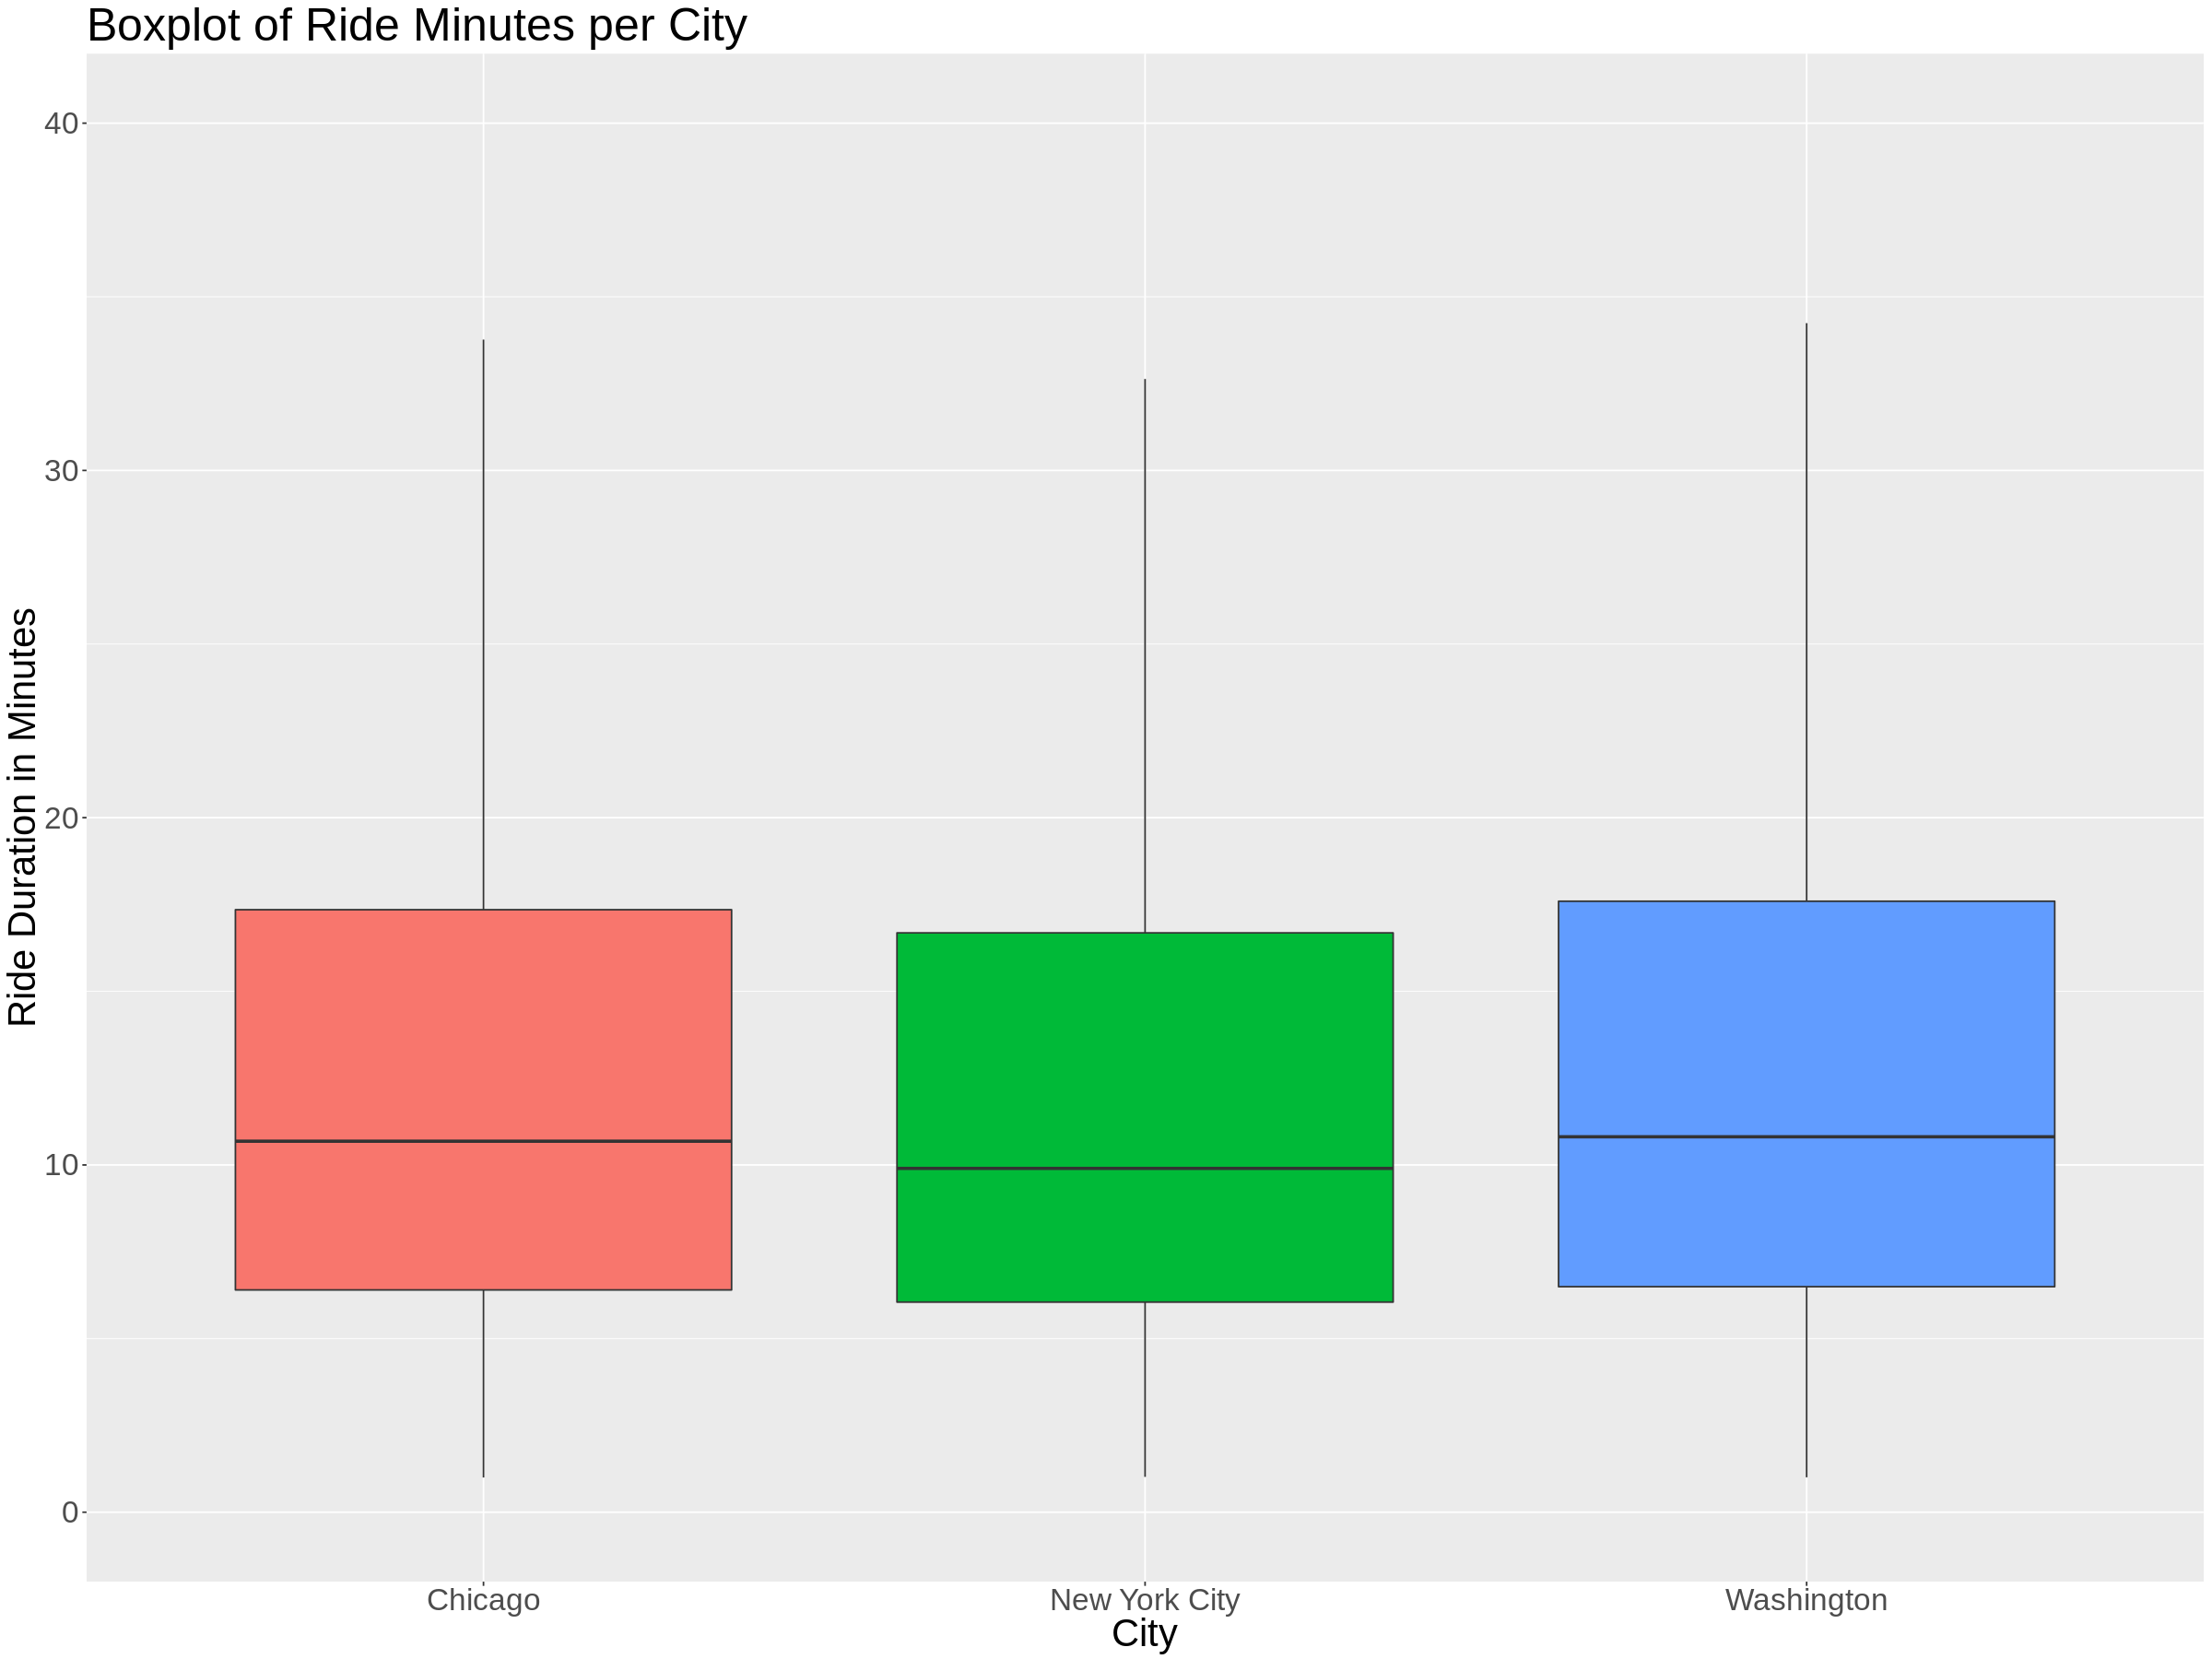

In [18]:
options(repr.plot.width=20, repr.plot.height=15)

ggplot(all_data, aes(x=City, y=Ride.Mins, fill = City))+
    geom_boxplot(show.legend=FALSE,
                 outlier.shape= NA)+
    theme(text = element_text(size = 25))+
    scale_y_continuous(limits = c(0, 40))+ 
    labs(title = "Boxplot of Ride Minutes per City",
         x = 'City',
         y = 'Ride Duration in Minutes')


This box plot is intereting and tells me that eventhough the market size varies the ride duration doesn't vary much. Based on this plot NYC looks to have the shortest trips, it is only by a few minutes. The median ride is ~11 minutes.

Rather than looking at this by city, I want to see if the UserType has an affect on the duration.

Warning message:
“Removed 3796 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

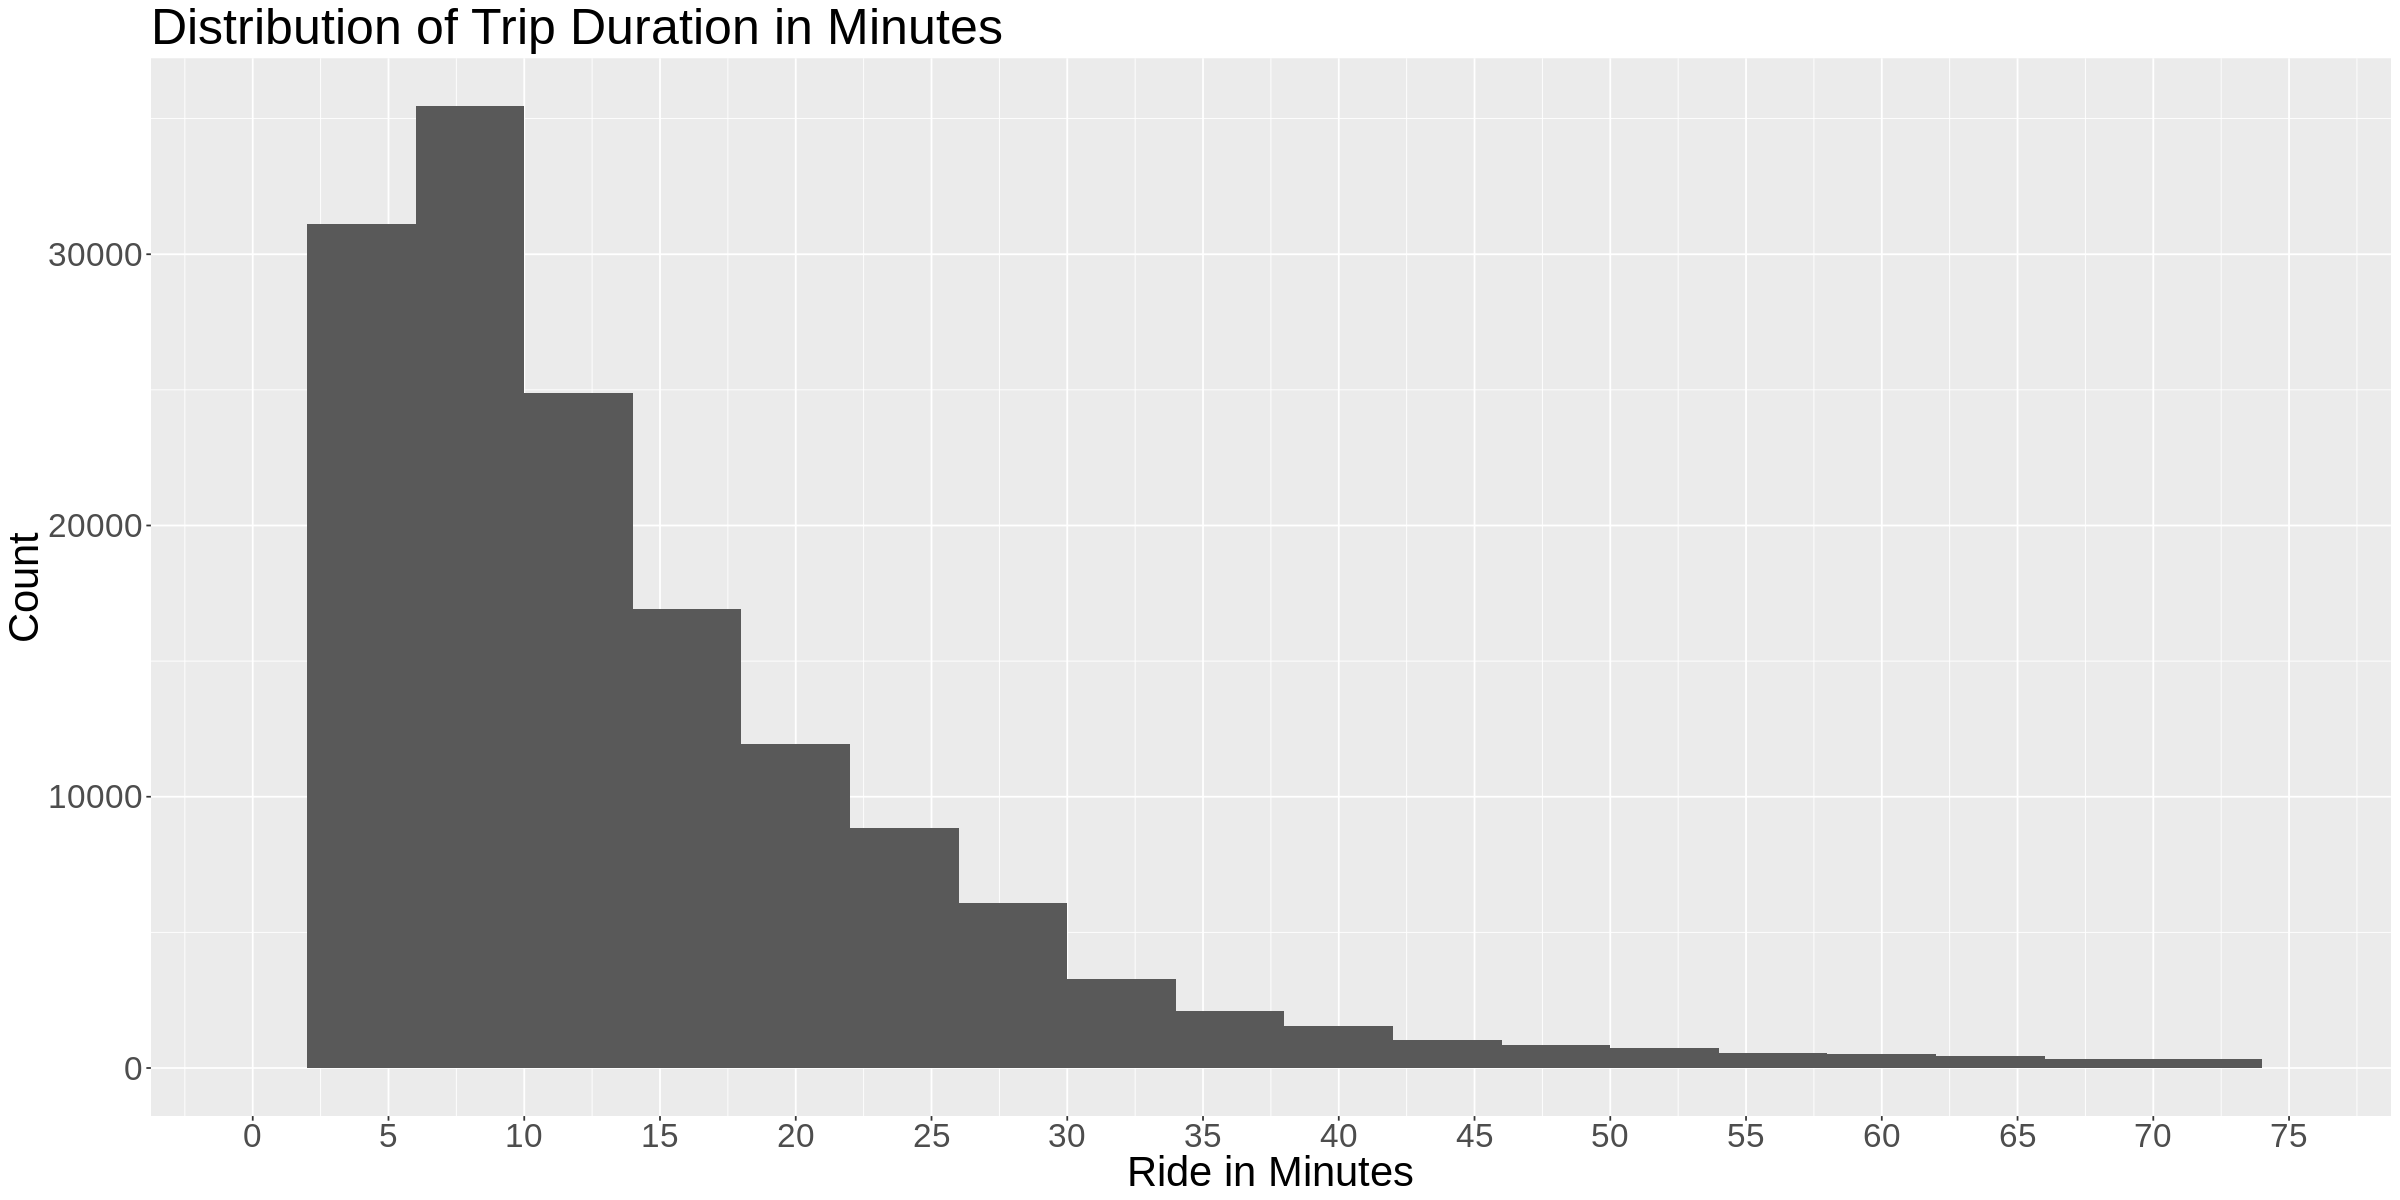

In [19]:
options(repr.plot.width=20, repr.plot.height=10)

ggplot(aes(x=Ride.Mins), data=all_data)+
    geom_histogram(binwidth=4)+
    scale_x_continuous(limits=c(0, 75), breaks=seq(0, 75, 5))+
    theme(text = element_text(size = 25))+ 
    labs(title = "Distribution of Trip Duration in Minutes",
         x = 'Ride in Minutes',
         y = 'Count')

Most rides are between 6 and 10 minutes.

Warning message:
“Removed 3790 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing missing values (geom_bar).”

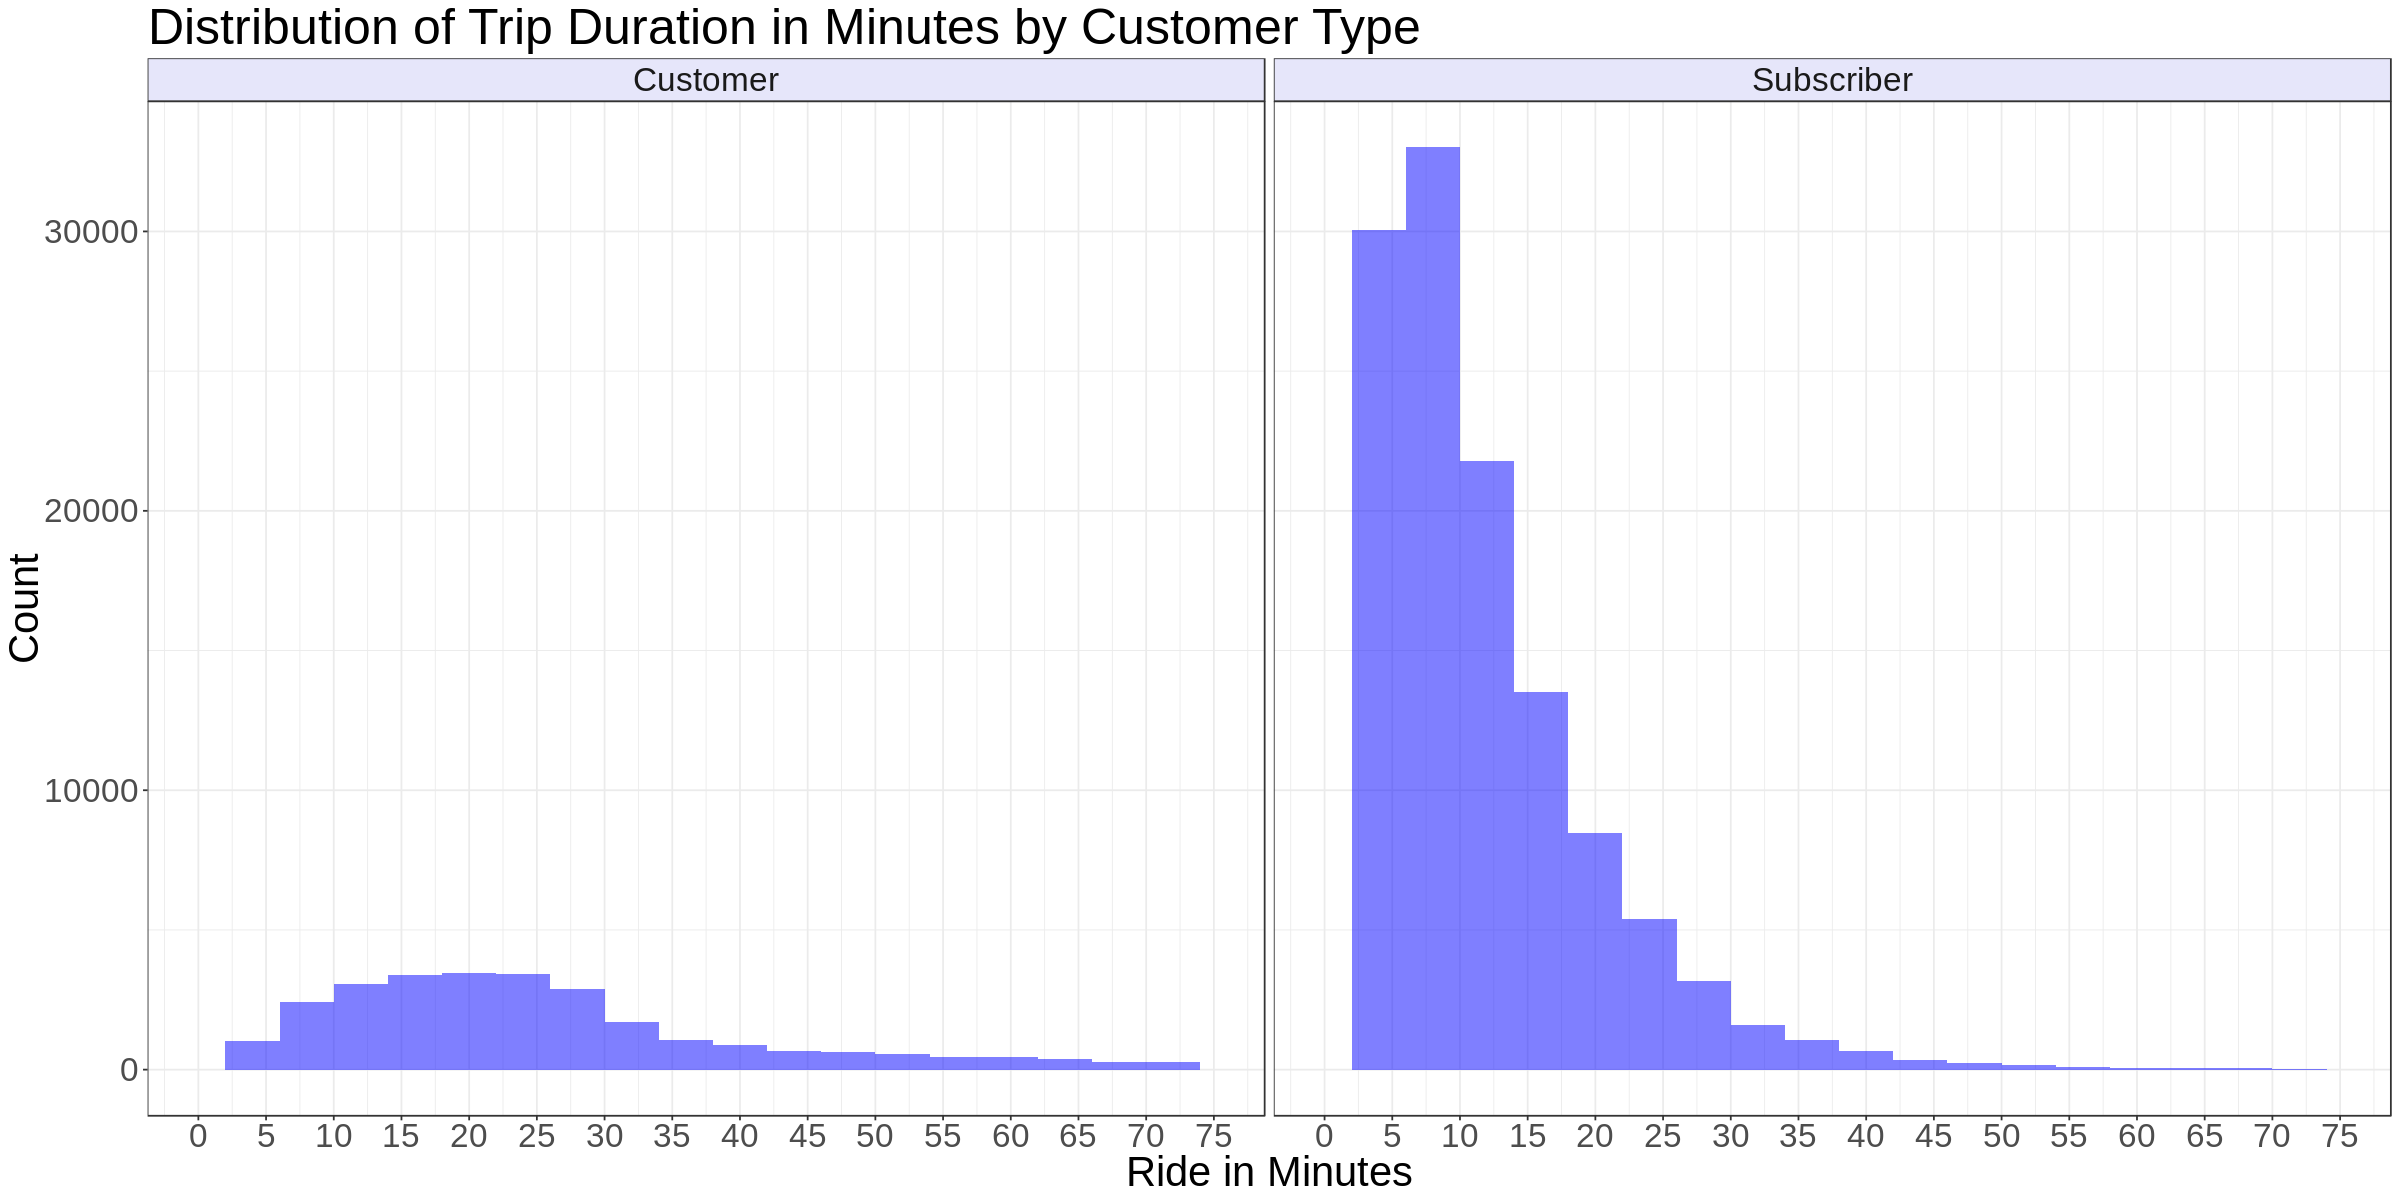

In [20]:
ggplot(aes(x=Ride.Mins), data=subset(all_data, User.Type!=""))+
    geom_histogram(binwidth=4, fill='blue', alpha=0.5)+
    scale_x_continuous(limits=c(0, 75), breaks=seq(0, 75, 5))+
    facet_wrap(~User.Type)+
    theme(text = element_text(size = 23))+
    theme_bw()+
    theme(legend.position = "none")+
    theme(text = element_text(size = 25))+ 
    theme(strip.background = element_rect(fill='lavender'))+
    labs(title = "Distribution of Trip Duration in Minutes by Customer Type",
         x = 'Ride in Minutes',
         y = 'Count')


Here we can wee that the duration of the ride is different between the usertypes. The majority of rides from the subscribers are 5-10 minutes and the customers ride between 10-30 minutes.

Warning message:
“Removed 3790 rows containing non-finite values (stat_bin).”Warning message:
“Removed 12 rows containing missing values (geom_bar).”

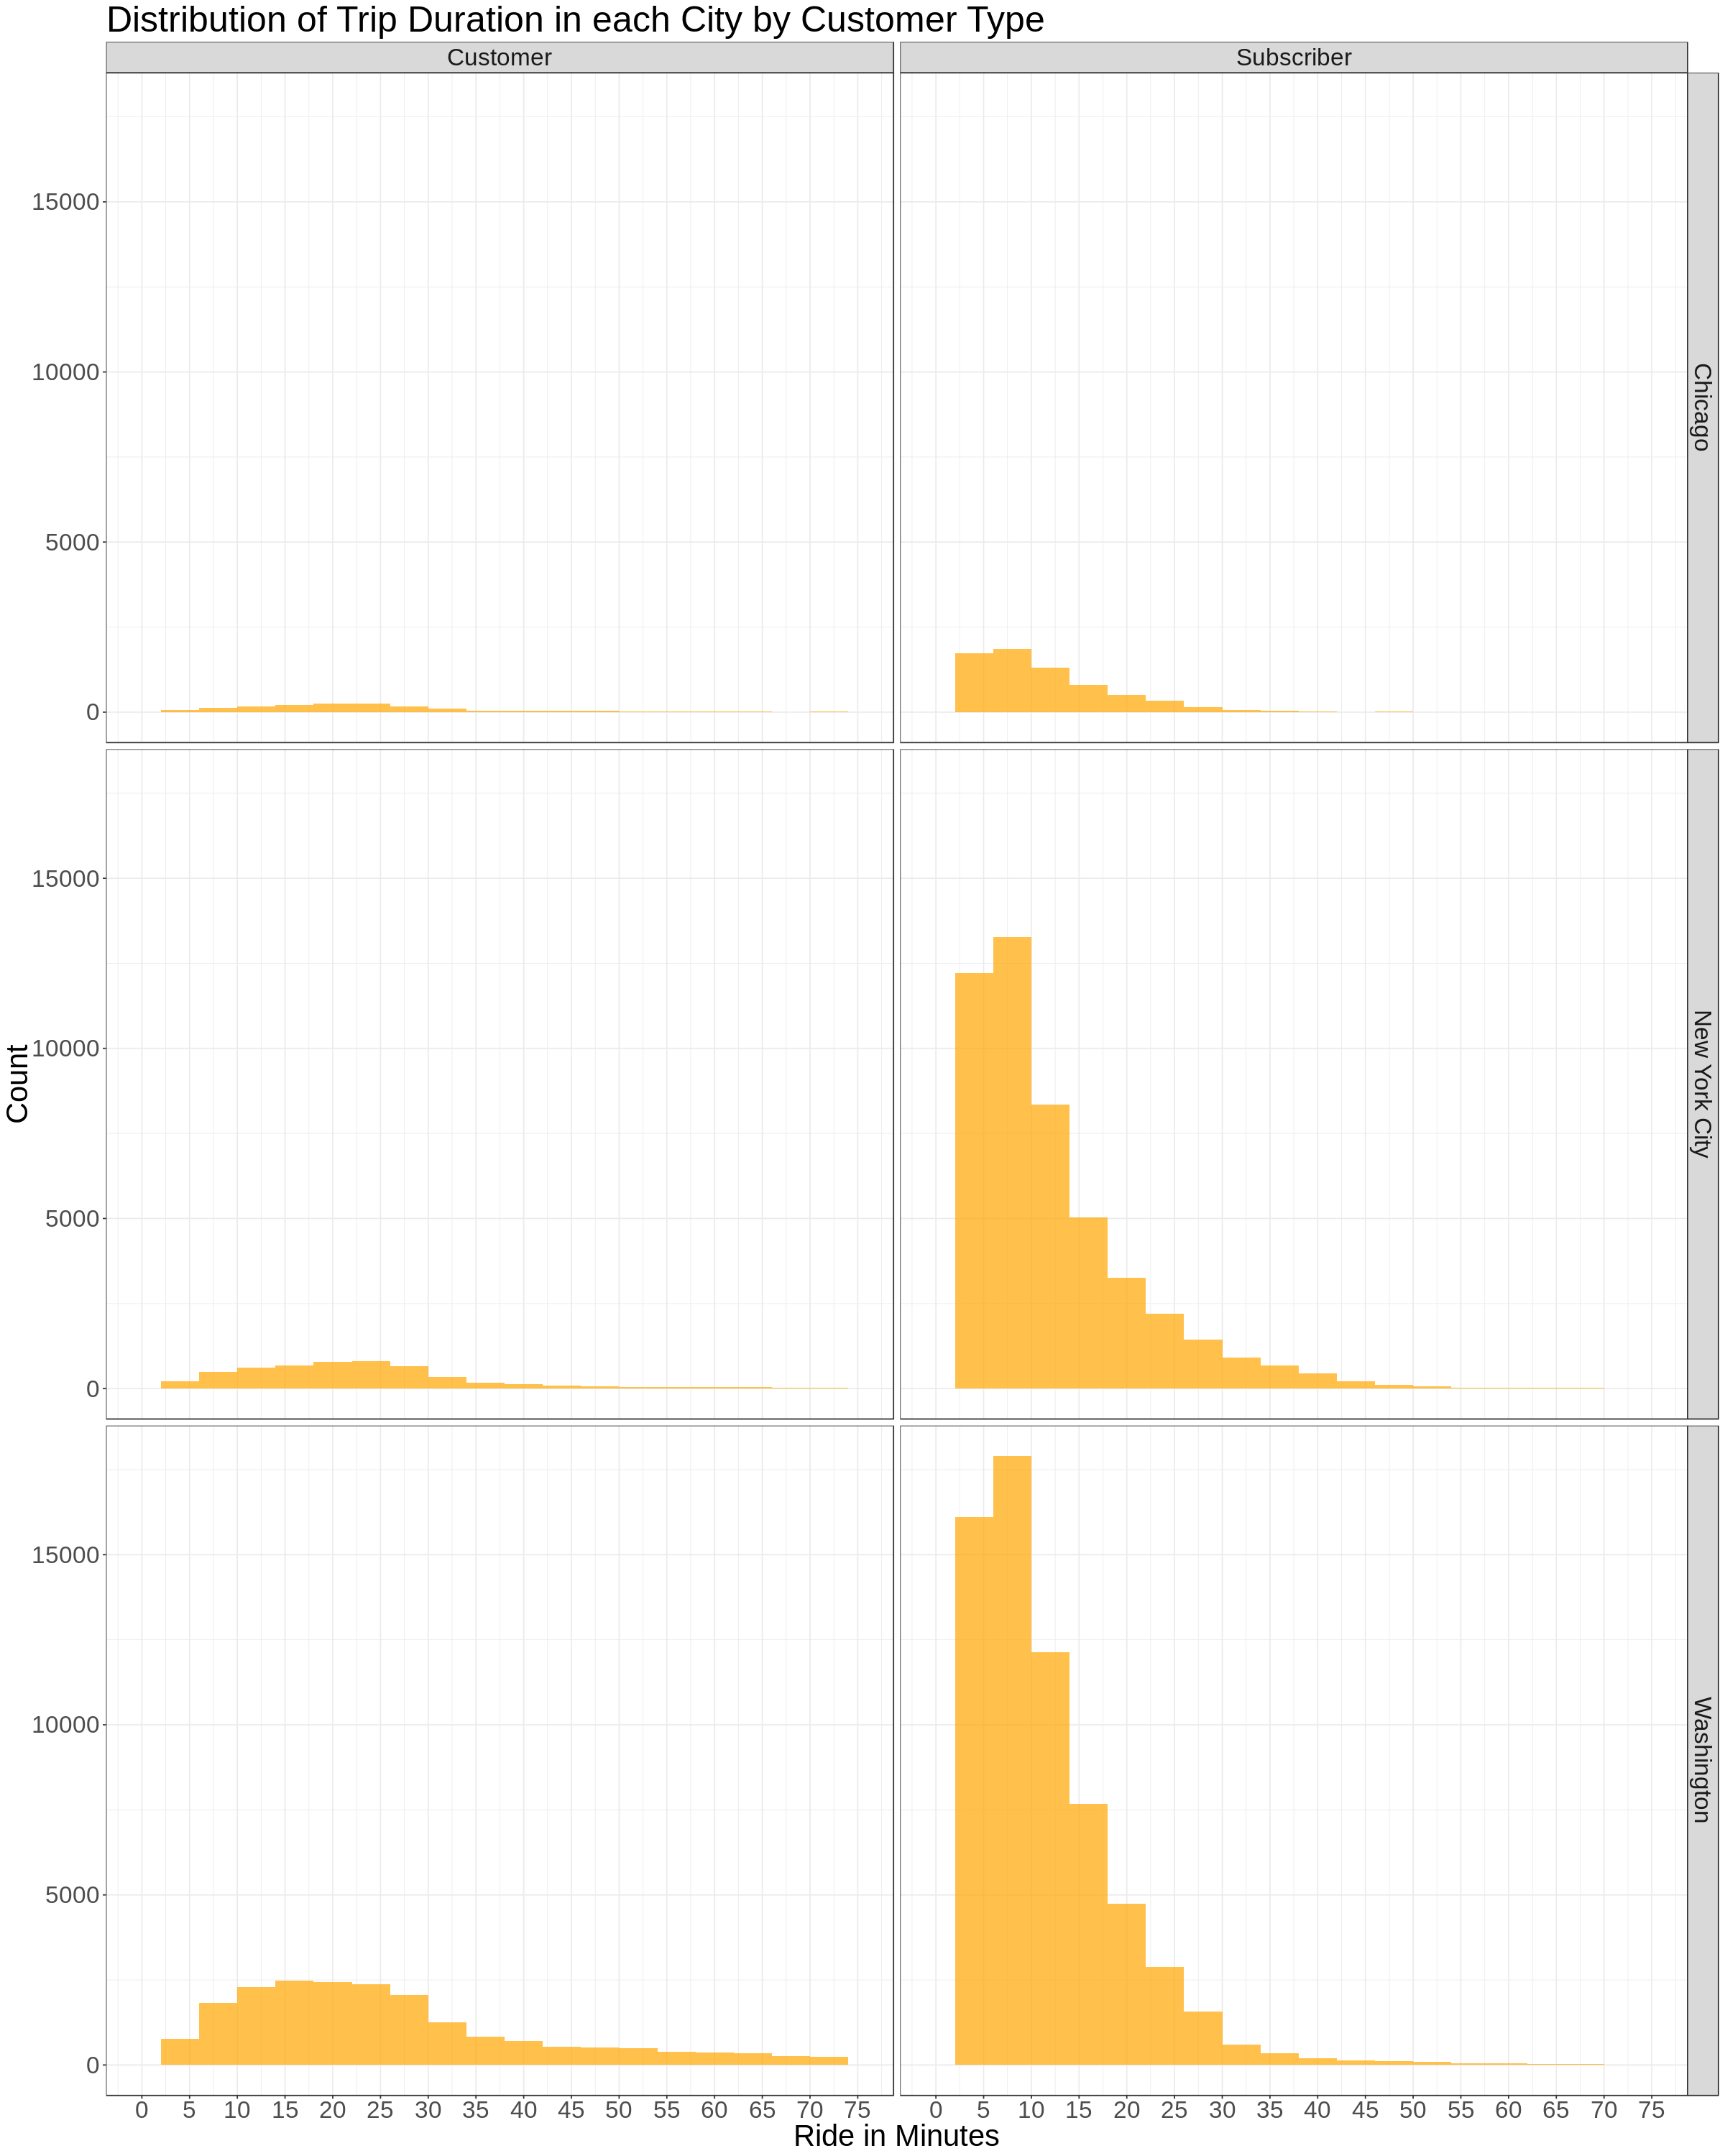

In [21]:
options(repr.plot.width=20, repr.plot.height=25)

ggplot(aes(x=Ride.Mins), data=subset(all_data, User.Type!=""))+
    geom_histogram(binwidth=4, fill='orange', alpha=0.7)+
    scale_x_continuous(limits=c(0, 75), breaks=seq(0, 75, 5))+
    facet_grid(vars(City), vars(User.Type))+
    theme(text = element_text(size = 23))+
    theme_bw()+
    theme(legend.position = "none")+
    theme(text = element_text(size = 25))+ 
    labs(title = "Distribution of Trip Duration in each City by Customer Type",
         x = 'Ride in Minutes',
         y = 'Count')


**Summary**

The result of this analysis is very interesting. As we saw in the boxplot the ride duration has little variation (within a minute or two) in the individual markets. When we looked at the data by customer, we saw that the regular customer rides longer than the subscriber. 

After that I explored further to see if the subscriber and customer rides were different within the induvial markets. I found that once again the market doesn't really affect the duration of the ride, but the type of customer does. The subscribers typical ride is about 5-10 minutes, while the customers ride is closer to 10-30 minutes. 


<a id='Conclusion'></a>
## Conclusion

This data exploration gave us very interesting insights. We fould that Washington is by far the largest marketing with just under 90,000 users. Every market has a much larger subscriber base as opposed to regular customers. 

The most popular day for Washington and New York city is Wednesday, and for Chicago it is a Friday. 

We also leared that the trip duration isn't really affected by the market, but is definitely influenced by the customer type. 



In [22]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')